## First, I generate a list of notable rap albums from each year spanning the past two decades. 

https://docs.google.com/spreadsheets/d/1lNlh7dN7GhKWR0GChKi1oT8jdzJK0kQ0wEW6nhMXogc/edit?usp=sharing


In [1]:
import pyphen
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize
import math
from collections import Counter 

In [2]:
df = pd.read_csv('album_title.csv')
print(df.head())
print(df.shape)

       Album      Artist  Year
0  Milky Way         Bas  2018
1   Kamikaze      Eminem  2018
2         ye  Kanye West  2018
3   Swimming  Mac Miller  2018
4      NASIR         Nas  2018
(125, 3)


### Once this list was generated, I scraped genius.com for lyrics to all songs for each of the 125 albums. We get a dataset of 2313 songs.

In [3]:
df = pd.read_csv('song_database', usecols= ['Song', 'Album','Year', 'Artist', 'Lyrics'])
print(df.head())
print(df.shape)

                   Song      Album  Year Artist  \
0                Icarus  Milky-way  2018    Bas   
1            Front Desk  Milky-way  2018    Bas   
2                 Tribe  Milky-way  2018    Bas   
3            Boca Raton  Milky-way  2018    Bas   
4  Barack Obama Special  Milky-way  2018    Bas   

                                              Lyrics  
0  \n\n[Intro: The Hics]\nSince I've let go of yo...  
1  \n\n[Intro]\nRiding 'round the town ducking my...  
2  \n\n[Intro: J. Cole & Bas]\nThis one's for you...  
3  \n\n[Chorus: Bas]\nI'm out in Boca Raton\nI'm ...  
4  \n\n[Interlude]\nY'all hear the voice, y'all s...  
(2313, 5)


## Next, we need to parse and tokenize the lyrics. In order to do this, we parse out stopwords, as well as any other genius-specific words in the lyrics such as [Intro] and [Interlude] 

In [4]:
#generate corpus word_cloud
df = pd.read_csv('song_database')
stop_words = set(stopwords.words('english'))
genius_stop = ['im', 'intro', 'chorus', 'verse', 'refrain', 'hook', 'outro', 'produced', 'directed']
stop_words |=set(genius_stop)

def generate_wordcloud(df,stop_words):
    d={}
    massive_string = ""
    for index, row in df.iterrows():
        if type(row['Lyrics']) is str:
            word_tokens = word_tokenize(row['Lyrics'])
            artist_stop = [str(row['Artist']).lower]
            stop_words |= set(artist_stop)
            filtered_sentence = [w for w in word_tokens if not w in stop_words]
            massive_string += ' '.join(x for x in filtered_sentence)
    word_cloud = WordCloud().generate(massive_string)
    plt.figure(figsize=(30,15))
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.show()
    return 0

def word_analysis(df, stop_words):
    d={}
    for index, row in df.iterrows():
        massive_string = ''
        if type(row['Lyrics']) is str:
            row['Lyrics'] = row['Lyrics'].lower()
            #row['Lyrics'] = re.sub(r'\[[^()]*\]', '', row['Lyrics'])
            row['Lyrics'] = re.sub('\'', '', row['Lyrics'])
            row['Lyrics'] = re.sub(row['Artist'].lower(), '', row['Lyrics'])
            row['Lyrics'] = re.sub('[^a-zA-Z]',' ', row['Lyrics'])
            word_tokens = word_tokenize(row['Lyrics'])
            artist_stop = [str(row['Artist']).lower]
            stop_words |= set(artist_stop)
            filtered_sentence = [w for w in word_tokens if not w in stop_words]
            for key in filtered_sentence:
                d[key] = d.get(key,0)+1
            massive_string += ' '.join(x for x in filtered_sentence)
    wcount = sorted(d.items(),key = lambda x: x[1], reverse = True)
    return wcount



## Let's try generating a word cloud for the most used words in Rap. 

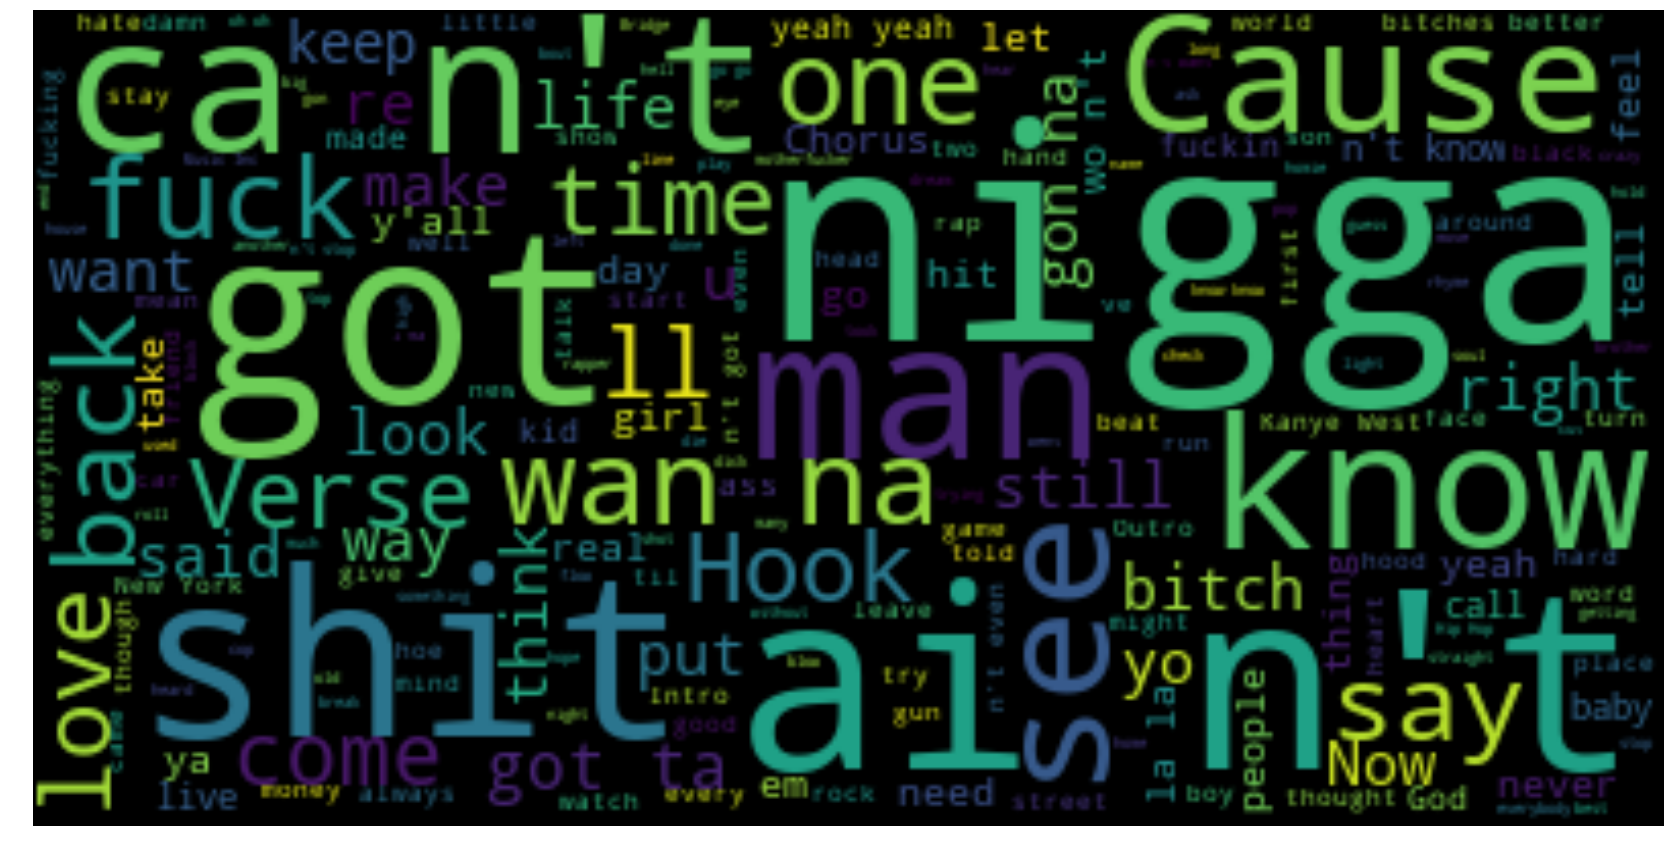

0

In [5]:
generate_wordcloud(df, stop_words)

## Next, I'm interested in a deeper look at specific rappers and their lyrics. Let's look at a few rappers. We pay special attention to words with lyrics over 5 syllables. 

---------------------------------------------------------------------


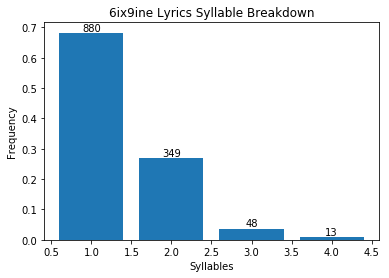

<Figure size 2160x1080 with 0 Axes>

100 of the most used words 
 [('nigga', 216), ('dont', 182), ('yeah', 176), ('fuck', 115), ('niggas', 108), ('want', 101), ('bitch', 87), ('gang', 79), ('scum', 77), ('got', 74), ('throw', 70), ('shit', 69), ('back', 66), ('uh', 65), ('aint', 63), ('get', 57), ('gotti', 42), ('really', 40), ('gon', 39), ('know', 39), ('bust', 36), ('like', 35), ('boy', 34), ('smoke', 33), ('give', 32), ('none', 32), ('bang', 30), ('fuckin', 30), ('pull', 30), ('pussy', 30), ('money', 27), ('let', 27), ('dick', 27), ('hit', 26), ('em', 26), ('scummy', 26), ('open', 26), ('shots', 25), ('bring', 25), ('take', 22), ('stomp', 22), ('bands', 21), ('ho', 21), ('go', 20), ('dumb', 20), ('lil', 20), ('shoot', 20), ('pop', 20), ('bamz', 20), ('wildest', 20), ('thats', 19), ('life', 18), ('ima', 18), ('face', 18), ('represent', 18), ('baby', 17), ('yo', 17), ('oh', 17), ('talk', 17), ('regular', 17), ('te', 16), ('bitches', 16), ('mouth', 16), ('run', 16), ('whip', 16), ('drip', 15), ('na', 15), ('throwin', 15),

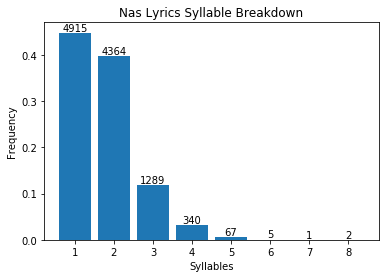

<Figure size 2160x1080 with 0 Axes>

100 of the most used words 
 [('niggas', 693), ('got', 675), ('like', 647), ('get', 575), ('know', 454), ('dont', 410), ('one', 395), ('cause', 392), ('nigga', 386), ('back', 381), ('man', 370), ('life', 356), ('love', 348), ('music', 347), ('aint', 341), ('see', 339), ('shit', 330), ('inc', 319), ('yall', 302), ('world', 300), ('yeah', 292), ('thats', 281), ('na', 278), ('never', 277), ('us', 275), ('time', 269), ('yo', 254), ('make', 254), ('ill', 233), ('black', 228), ('cant', 222), ('go', 220), ('fuck', 219), ('new', 212), ('real', 208), ('come', 204), ('em', 202), ('still', 196), ('want', 196), ('could', 196), ('right', 195), ('every', 194), ('money', 192), ('ascap', 186), ('say', 183), ('made', 175), ('wan', 174), ('think', 170), ('shot', 169), ('hit', 169), ('gon', 169), ('take', 167), ('big', 164), ('cops', 161), ('let', 159), ('put', 158), ('baby', 150), ('kid', 149), ('live', 147), ('good', 144), ('way', 143), ('n', 143), ('two', 142), ('ta', 141), ('god', 140), ('hood', 140)

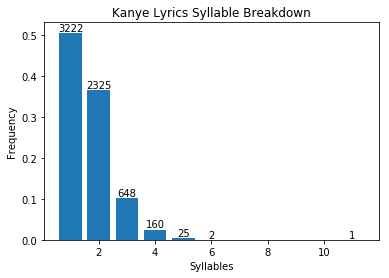

<Figure size 2160x1080 with 0 Axes>

100 of the most used words 
 [('like', 710), ('got', 684), ('get', 666), ('know', 661), ('kanye', 623), ('west', 582), ('la', 541), ('dont', 474), ('go', 362), ('aint', 337), ('cant', 329), ('right', 317), ('say', 312), ('see', 304), ('thats', 294), ('gon', 292), ('yeah', 285), ('shit', 283), ('oh', 278), ('na', 274), ('never', 264), ('man', 263), ('make', 256), ('cause', 256), ('need', 255), ('love', 254), ('ever', 253), ('back', 249), ('feel', 234), ('one', 219), ('good', 212), ('uh', 207), ('let', 207), ('girl', 203), ('still', 187), ('baby', 186), ('want', 184), ('ta', 182), ('tell', 181), ('life', 181), ('niggas', 179), ('nigga', 178), ('could', 173), ('ya', 173), ('told', 172), ('way', 171), ('music', 168), ('time', 166), ('forever', 157), ('wan', 154), ('take', 153), ('day', 153), ('better', 153), ('said', 147), ('god', 146), ('keep', 145), ('us', 143), ('work', 141), ('sky', 140), ('yall', 136), ('em', 134), ('money', 134), ('hey', 133), ('fuck', 130), ('night', 125), ('leave',

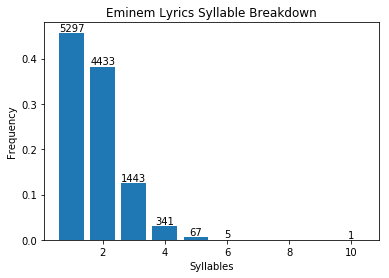

<Figure size 2160x1080 with 0 Axes>

100 of the most used words 
 [('like', 1623), ('dont', 1336), ('get', 1127), ('cause', 1092), ('got', 833), ('back', 794), ('fuck', 766), ('know', 752), ('shit', 749), ('na', 664), ('go', 662), ('aint', 621), ('youre', 611), ('one', 566), ('see', 522), ('say', 504), ('never', 496), ('thats', 464), ('em', 453), ('think', 446), ('cant', 435), ('gon', 423), ('man', 415), ('yeah', 409), ('oh', 406), ('fuckin', 403), ('bitch', 399), ('time', 380), ('ill', 375), ('make', 373), ('come', 369), ('take', 350), ('little', 340), ('give', 338), ('let', 317), ('us', 317), ('even', 312), ('love', 310), ('shady', 307), ('wan', 305), ('feel', 304), ('right', 294), ('put', 287), ('way', 283), ('look', 272), ('til', 271), ('name', 269), ('ass', 268), ('want', 265), ('baby', 261), ('ah', 259), ('ever', 257), ('said', 255), ('still', 255), ('two', 238), ('girl', 238), ('slim', 236), ('well', 231), ('better', 230), ('world', 229), ('music', 229), ('every', 227), ('yo', 226), ('need', 226), ('could', 217), (

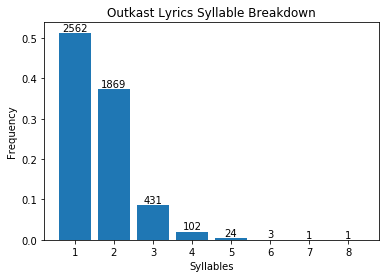

<Figure size 2160x1080 with 0 Axes>

100 of the most used words 
 [('like', 510), ('got', 242), ('uh', 202), ('big', 200), ('dont', 200), ('get', 192), ('know', 185), ('boi', 169), ('nigga', 164), ('clean', 154), ('shit', 153), ('cause', 146), ('aint', 142), ('na', 135), ('yeah', 129), ('andr', 116), ('music', 115), ('back', 114), ('niggas', 113), ('make', 111), ('wan', 110), ('say', 104), ('fresh', 103), ('see', 93), ('ha', 93), ('baby', 91), ('go', 90), ('one', 89), ('andre', 84), ('atlanta', 82), ('love', 82), ('gon', 81), ('thats', 80), ('ga', 80), ('inc', 79), ('want', 77), ('cant', 73), ('never', 73), ('time', 71), ('way', 68), ('damn', 67), ('ya', 66), ('done', 63), ('us', 62), ('keep', 61), ('really', 61), ('gangsta', 61), ('assisted', 61), ('school', 60), ('head', 59), ('let', 58), ('vocals', 57), ('everybody', 56), ('top', 56), ('recording', 56), ('man', 55), ('come', 54), ('think', 54), ('stankonia', 53), ('dungeon', 53), ('yall', 52), ('real', 51), ('even', 51), ('huh', 51), ('well', 50), ('day', 50), ('bout',

In [6]:
def syllable_count(word_list, artist):
    print('---------------------------------------------------------------------')
    syl_dic = {}
    labels = []
    data = []
    counts= []
    syllable_dict = pyphen.Pyphen(lang='en')
    for x in word_list:
        word = syllable_dict.inserted(x[0])
        syllables = len([c for c in word if c =='-']) + 1
        if syllables >5:
            print (word)
        if syllables not in syl_dic:
            syl_dic[syllables] =1
        else:
            syl_dic[syllables] +=1
            
    for x in syl_dic:
        labels.append(x)
        data.append(round(syl_dic[x]/len(word_list), 4))
        counts.append(syl_dic[x])
    fig1, ax1 = plt.subplots()
    ax1.bar(labels, data)
    #ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set(title= artist + ' Lyrics Syllable Breakdown')
    ax1.set_xlabel('Syllables')
    ax1.set_ylabel('Frequency')
    
    rects = ax1.patches
    # Make some labels.

    for rect, counts in zip(rects, counts):
        height = rect.get_height()
        ax1.text(rect.get_x() + rect.get_width() / 2, height, counts,
                ha='center', va='bottom')
    plt.figure(figsize=(30,15))
    plt.show()
    print('100 of the most used words and their frequencies\n',word_list[:100])
    return 0


corpus_words = word_analysis(df, stop_words)
nas_words = word_analysis(df[df['Artist'] == 'Nas'], stop_words)
dumbass_words = word_analysis(df[df['Artist'] == '6ix9ine'] , stop_words)
kanye_words = word_analysis(df[df['Artist'] == 'Kanye-west'], stop_words)
eminem_words = word_analysis(df[df['Artist'] == 'Eminem'], stop_words)
outkast_words = word_analysis(df[df['Artist'] == 'Outkast'], stop_words)

chart_data = syllable_count(dumbass_words, '6ix9ine')
chart_data = syllable_count(nas_words, 'Nas')
chart_data = syllable_count(kanye_words, 'Kanye')
chart_data = syllable_count(eminem_words, 'Eminem')
chart_data = syllable_count(outkast_words, 'Outkast')






## Word Counts do now tell the whole story. Let's look at some TF-IDF's

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import math 

def to_string(df, stop_words):
    string = ''
    for index, row in df.iterrows():
        if type(row['Lyrics']) is str:
            row['Lyrics'] = row['Lyrics'].lower()
            row['Lyrics'] = re.sub('\'', '', row['Lyrics'])
            row['Lyrics'] = re.sub(row['Artist'].lower(), '', row['Lyrics'])
            row['Lyrics'] = re.sub('[^a-zA-Z]',' ', row['Lyrics'])
            word_tokens = word_tokenize(row['Lyrics'])
            artist_stop = [str(row['Artist']).lower]
            stop_words |= set(artist_stop)
            filtered_sentence = [w for w in word_tokens if not w in stop_words]
            string += ' '.join(x for x in filtered_sentence)
    return string

def corpus_analysis(df, stop_words):
    d={}
    for index, row in df.iterrows():
        massive_string = ''
        if type(row['Lyrics']) is str:
            row['Lyrics'] = row['Lyrics'].lower()
            #row['Lyrics'] = re.sub(r'\[[^()]*\]', '', row['Lyrics'])
            row['Lyrics'] = re.sub('\'', '', row['Lyrics'])
            row['Lyrics'] = re.sub(row['Artist'].lower(), '', row['Lyrics'])
            row['Lyrics'] = re.sub('[^a-zA-Z]',' ', row['Lyrics'])
            word_tokens = word_tokenize(row['Lyrics'])
            artist_stop = [str(row['Artist']).lower]
            stop_words |= set(artist_stop)
            filtered_sentence = [w for w in word_tokens if not w in stop_words]
            for key in filtered_sentence:
                d[key] = d.get(key,0)+1
            massive_string += ' '.join(x for x in filtered_sentence)
    return massive_string


def tfIDF(df,artist, stop_words):
    artist_num = 0
    artist_dictionary={}
    df_artist = df[df['Artist'] == artist]
    df_other = df[df['Artist'] != artist]
    
    artist_words = word_analysis(df_artist, stop_words)
    for index, row in df_other.iterrows():
        if row['Artist'] not in artist_dictionary:
            artist_num +=1
            artist_dictionary[row['Artist']] = corpus_analysis(df_other[df_other['Artist'] == row['Artist']], stop_words)
    return artist_words, artist_dictionary, artist_num

def print_dic(dic):
    for key in dic:
        print(key, dic[key])#[:50])
        print('\n')
    return 0

def tf(artist_words, artist_dictionary, artist_num):
    scores = {}
    scores_ = []
    
    for word in artist_words:
        output = (idf(word, artist_dictionary, artist_num))
        scores_.append(output)
        
    df_ = pd.DataFrame.from_records(scores_, columns=['word','TF-IDF','count','In Document'])
    df_ = df_.sort_values(['TF-IDF', 'count'], ascending=[False, False])
    print('20 Most Unique Words')
    print(df_.head(20))
    
def idf(word, artist_dictionary, document_count):
    count = 0
    for key in artist_dictionary:
        if word[0] in artist_dictionary[key]:
            count +=1
#     print(word[0], math.log10(1+(document_count/(count+0.1))), document_count, count)
    return (word[0], math.log10(1+(document_count/(count+0.1))), word[1], count)



In [8]:
artist = '50-cent'
artist_words, artist_dictionary, artist_num= tfIDF(df,artist, stop_words)
tf(artist_words, artist_dictionary, artist_num)

20 Most Unique Words
           word    TF-IDF  count  In Document
100     gangsta  2.786041     18            0
128        dogg  2.786041     16            0
130       snoop  2.786041     15            0
166     shopper  2.786041     12            0
211      peeled  2.786041     10            0
232      eminem  2.786041      9            0
262   patiently  2.786041      8            0
267        nypd  2.786041      8            0
271       finer  2.786041      7            0
287     stabbed  2.786041      7            0
290       banks  2.786041      7            0
305        mami  2.786041      7            0
311       perms  2.786041      7            0
312        yayo  2.786041      7            0
322      hollow  2.786041      6            0
323     watched  2.786041      6            0
332  dealership  2.786041      6            0
335      robbed  2.786041      6            0
338       lloyd  2.786041      6            0
351       assll  2.786041      6            0


In [9]:
artist = 'Nas'
artist_words, artist_dictionary, artist_num= tfIDF(df,artist, stop_words)
tf(artist_words, artist_dictionary, artist_num)

20 Most Unique Words
             word    TF-IDF  count  In Document
204        crouse  2.786041     58            0
234  queensbridge  2.786041     51            0
242     gangsters  2.786041     50            0
337        silent  2.786041     40            0
359        salaam  2.786041     37            0
399         favor  2.786041     34            0
424         large  2.786041     32            0
450        poison  2.786041     31            0
455       bonjour  2.786041     30            0
469      tradamus  2.786041     30            0
487       escobar  2.786041     28            0
516    mastermind  2.786041     27            0
519         honey  2.786041     27            0
529  trackmasters  2.786041     27            0
544     prisoners  2.786041     26            0
574       gangsta  2.786041     24            0
585         ruled  2.786041     24            0
586        wetted  2.786041     24            0
588          guys  2.786041     23            0
598      gangstas  